# Credit Card Clustering

Kredi kartı kümelemesi, kredi kartı sahiplerini satın alma alışkanlıklarına, kredi limitlerine ve diğer birçok finansal faktöre göre gruplandırma görevidir.Bu projede, Makine Öğrenmesi ile kredi kartı kümelemesi görevini ele alacağım.

<img src="https://www.forbes.com/advisor/wp-content/uploads/2022/07/credit_cards.jpeg-1-1.jpg">

<a href="https://thecleverprogrammer.com/2022/10/03/credit-card-clustering-with-machine-learning/"> Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("CC GENERAL.csv")

### EDA

In [12]:
df.shape

(8637, 18)

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df["CREDIT_LIMIT"].value_counts()

CREDIT_LIMIT
3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: count, Length: 205, dtype: int64

In [9]:
df["CREDIT_LIMIT"]=df["CREDIT_LIMIT"].fillna(0)

In [8]:
df["MINIMUM_PAYMENTS"].value_counts()

MINIMUM_PAYMENTS
299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: count, Length: 8636, dtype: int64

In [10]:
df=df.dropna(subset="MINIMUM_PAYMENTS")

In [14]:
x=df[["BALANCE","PURCHASES","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"]]

In [15]:
x.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,1000.0,201.802084,139.509787
1,3202.467416,0.00,7000.0,4103.032597,1072.340217
2,2495.148862,773.17,7500.0,622.066742,627.284787
4,817.714335,16.00,1200.0,678.334763,244.791237
5,1809.828751,1333.28,1800.0,1400.057770,2407.246035


### Modelling

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#wcss= within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.5155977685074461
0.4716429795530099
0.4055379565164705
0.4054541732945326
0.4057289267513432
0.41376610351921816
0.3984113077598662
0.2996371786377336


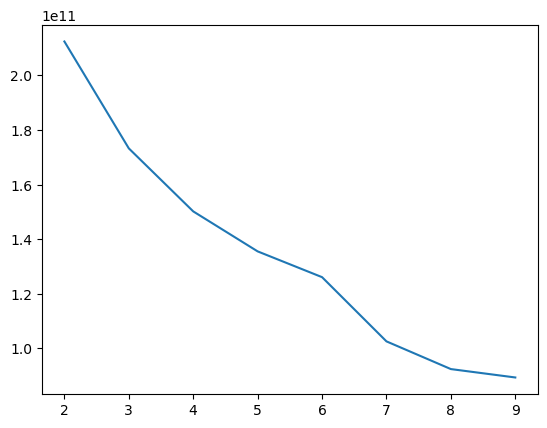

In [18]:
plt.plot(range(2,10),wcss)

In [19]:
from yellowbrick.cluster import KElbowVisualizer

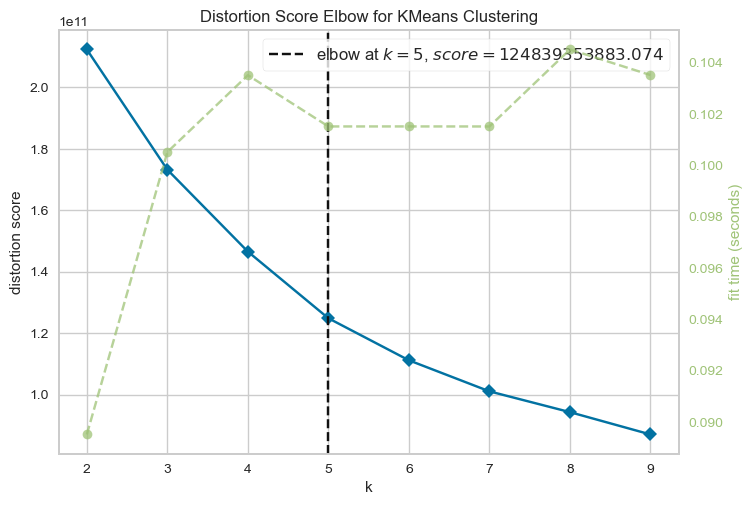

In [20]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show();

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
model=KMeans(5,random_state=42)

In [23]:
model.fit(x)

KMeans(n_clusters=5, random_state=42)

In [24]:
tahmin=model.predict(x)

In [25]:
silhouette_score(x,tahmin)

0.4048522418574982

In [27]:
x["Cluster"]=tahmin

C:\Users\erkan\AppData\Local\Temp\ipykernel_13808\2026189234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Cluster"]=tahmin


In [29]:
x["Cluster"].value_counts()

Cluster
1    5150
4    2318
3     625
0     492
2      52
Name: count, dtype: int64

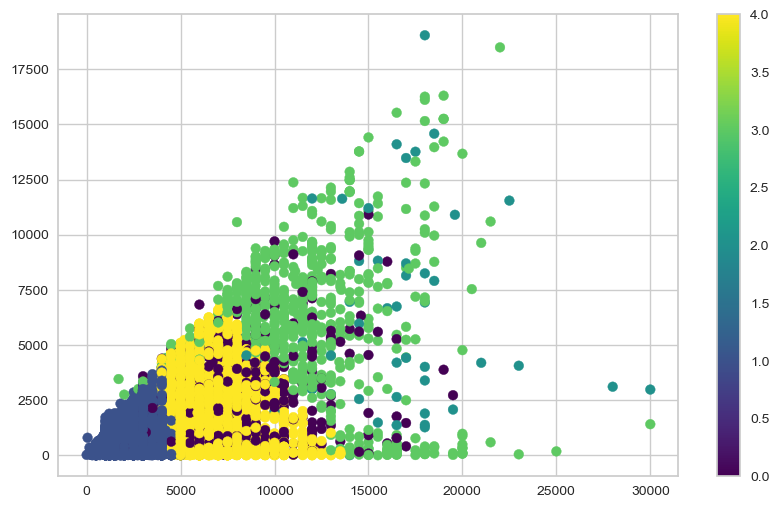

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(x["CREDIT_LIMIT"],x["BALANCE"], c=tahmin, cmap='viridis')
plt.colorbar()

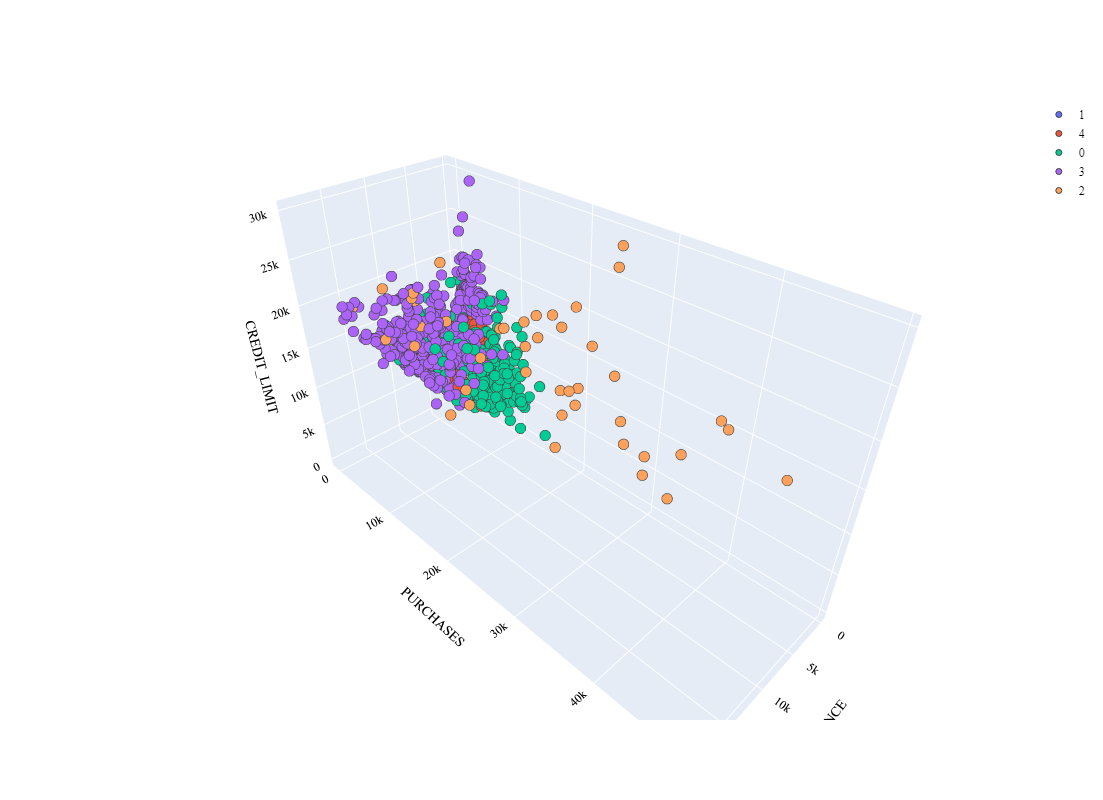

In [37]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(df["Cluster"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df[df["Cluster"]== i]['BALANCE'],
                                y = df[df["Cluster"] == i]['PURCHASES'],
                                z = df[df["Cluster"] == i]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))
# Kaynak:https://thecleverprogrammer.com/2022/10/03/credit-card-clustering-with-machine-learning/

In [38]:
data=linkage(x,method="complete")

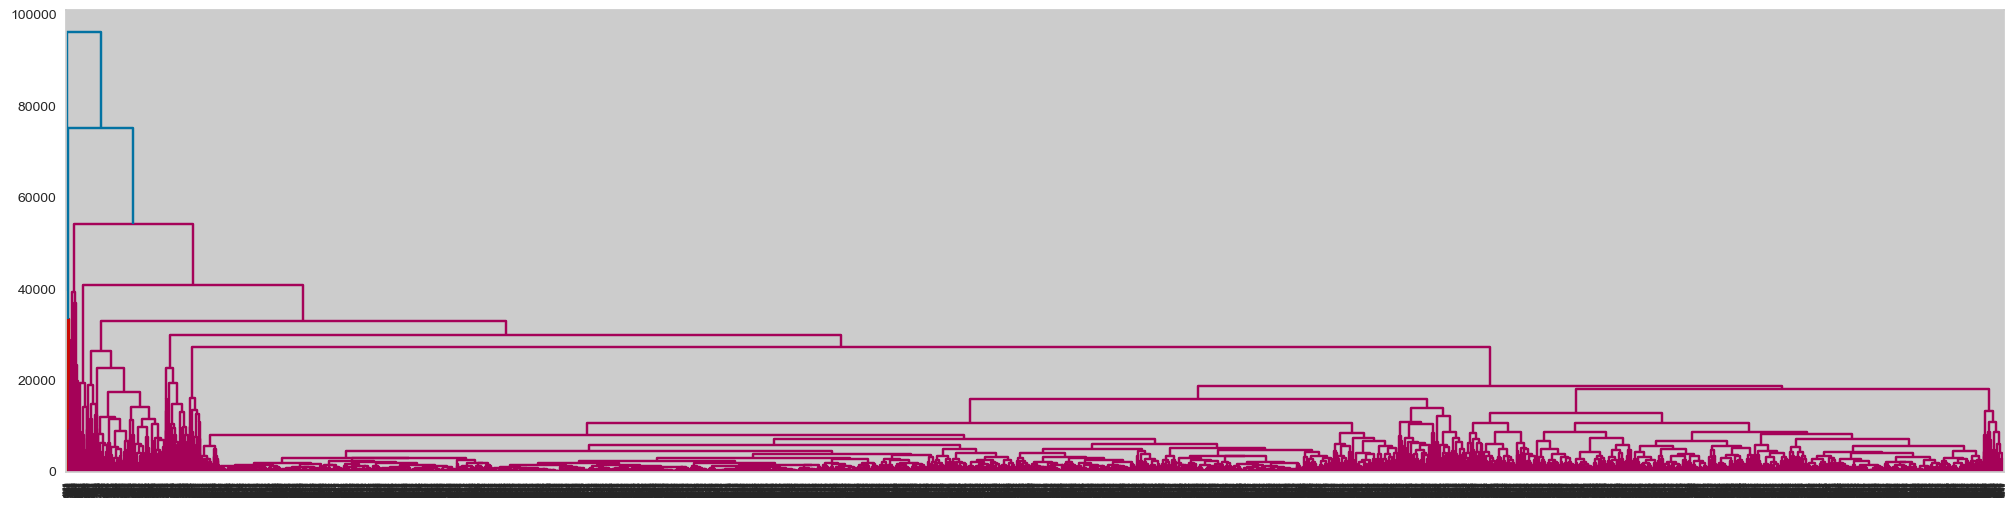

In [39]:
plt.figure(figsize=(25,6))
dendrogram(data);

<Axes: xlabel='Cluster', ylabel='count'>

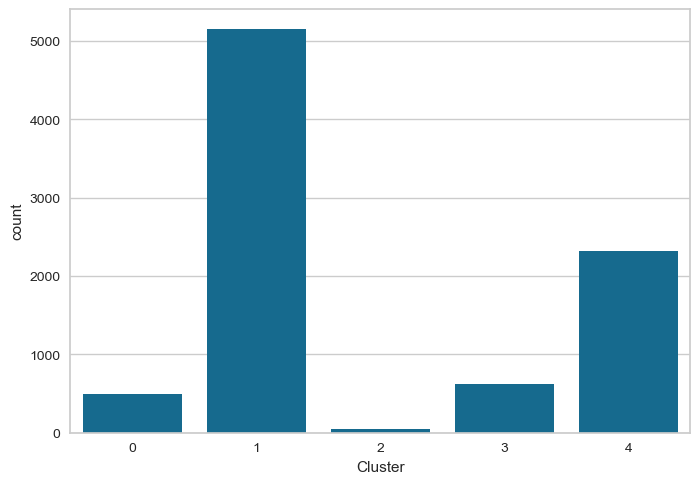

In [40]:
sns.countplot(x=df["Cluster"])

Sonuc olarak dirsek 5 de kırıldığı için 5 küme olusturduk. <br>
1 - 5150<br> 4 - 2318 <br>3 - 625<br> 0 - 492 <br>2 - 52<br>
küme sayılarımız bu sekilde.